In [1]:
import pandas as pd, numpy as np
import os, re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

import io
inp_tweets0 = pd.read_csv(io.BytesIO(uploaded['TwitterHate.csv']))
inp_tweets0.head()

Saving TwitterHate.csv to TwitterHate.csv


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


**Visualizing the distribution of targets**

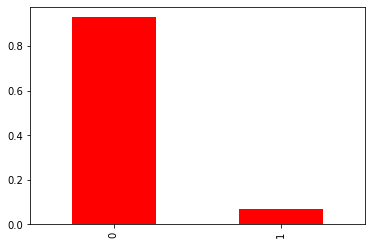

In [3]:
inp_tweets0.label.value_counts(normalize=True).plot.bar(color ='r')

**Visualizing Input features**


In [4]:
inp_tweets0.tweet.sample().values[0]

"@user me, i need another tattoo,  but we can't because i'm from perÃº  ."

In [5]:
tweets0 = inp_tweets0.tweet.values

In [6]:
len(tweets0)

31962

In [7]:
tweets0[:5]

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty',
       '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
       ' factsguide: society now    #motivation'], dtype=object)

In [8]:
tweets_lower = [twt.lower() for twt in tweets0]

In [9]:
tweets_lower[:5]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

**Text Preprocessing Steps:**

1.   Importing regualr expressions and removing special charcters from the tweets
2.   Converting text into tokens using the tokenizer method. NLTK.tokenize class offers a tokenizer function to specifically tokenize tweets and its called "TweetTokenizer"
3.   Removing Stopwords from the tokens
4.   Removing Punctuation from the tokens



In [10]:
import re

In [11]:
re.sub("@\w+","", "@Rahim this course rocks! http://rahimbaig.com/ai")

' this course rocks! http://rahimbaig.com/ai'

In [12]:
tweets_nouser = [re.sub("@\w+","", twt) for twt in tweets_lower]

In [13]:
tweets_nouser[:5]

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

In [14]:
re.sub("\w+://\S+","", "@Rahim this course rocks! http://rahimbaig.com/ai")

'@Rahim this course rocks! '

In [15]:
tweets_nourl = [re.sub("\w+://\S+","", twt) for twt in tweets_nouser]

In [16]:
tweets_nourl[:5]

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

In [17]:
from nltk.tokenize import TweetTokenizer

In [18]:
?TweetTokenizer()

In [19]:
tkn = TweetTokenizer()

In [20]:
print(tkn.tokenize(tweets_nourl[0]))

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#run']


In [21]:
tweet_token = [tkn.tokenize(sent) for sent in tweets_nourl]
print(tweet_token[0])

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#run']


In [22]:
from nltk.corpus import stopwords
from string import punctuation

In [23]:
import nltk
nltk.download('stopwords')
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
stop_punct.extend(['...','``',"''",".."])

In [25]:
stop_context = ['rt', 'amp']

In [26]:
stop_final = stop_nltk + stop_punct + stop_context

In [27]:
def del_stop(sent):
    return [re.sub("#","",term) for term in sent if ((term not in stop_final) & (len(term)>1))]

In [28]:
del_stop(tweet_token[4])

['factsguide', 'society', 'motivation']

**Generated Clean Text**

In [29]:
tweets_clean = [del_stop(tweet) for tweet in tweet_token]

**Visualizing the most commonly occuring words**

In [30]:
from collections import Counter

In [31]:
term_list = []
for tweet in tweets_clean:
    term_list.extend(tweet)

In [33]:
res = Counter(term_list)
res.most_common(10)

[('love', 2748),
 ('day', 2276),
 ('happy', 1684),
 ('time', 1131),
 ('life', 1118),
 ('like', 1047),
 ("i'm", 1018),
 ('today', 1013),
 ('new', 994),
 ('thankful', 946)]

In [34]:
tweets_clean[0]

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']

In [35]:
tweets_clean = [" ".join(tweet) for tweet in tweets_clean]

In [36]:
tweets_clean[0]

'father dysfunctional selfish drags kids dysfunction run'

In [38]:
len(tweets_clean)

31962

In [37]:
len(inp_tweets0.label)

31962

**Defining the input features and targets**

In [39]:
X = tweets_clean
y = inp_tweets0.label.values

**Spliting the input and output variables into train and test data**

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

**Converting the word corpus into input vectors using the tfidf vectorizer method**

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
vectorizer = TfidfVectorizer(max_features = 5000)

In [43]:
len(X_train), len(X_test)

(22373, 9589)

In [44]:
X_train_bow = vectorizer.fit_transform(X_train)

X_test_bow = vectorizer.transform(X_test)

In [45]:
X_train_bow.shape, X_test_bow.shape

((22373, 5000), (9589, 5000))

**Using Logistic regression to fit and predict twitter hate instigated**


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression()

In [48]:
logreg.fit(X_train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_train_pred = logreg.predict(X_train_bow)
y_test_pred = logreg.predict(X_test_bow)

**Gauging the model's accuracy**


In [50]:
from sklearn.metrics import accuracy_score, classification_report

In [51]:
accuracy_score(y_train, y_train_pred) 

0.9560184150538595

In [52]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20815
           1       0.96      0.39      0.55      1558

    accuracy                           0.96     22373
   macro avg       0.96      0.69      0.76     22373
weighted avg       0.96      0.96      0.95     22373



In [53]:
logreg = LogisticRegression(class_weight="balanced")

In [54]:
logreg.fit(X_train_bow, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_train_pred = logreg.predict(X_train_bow)
y_test_pred = logreg.predict(X_test_bow)

In [56]:
accuracy_score(y_train, y_train_pred)

0.9535153980244044

In [57]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     20815
           1       0.60      0.97      0.74      1558

    accuracy                           0.95     22373
   macro avg       0.80      0.96      0.86     22373
weighted avg       0.97      0.95      0.96     22373



In [58]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [59]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.01,0.1,1,10,100],
    'penalty': ["l1","l2"]
}

In [60]:
classifier_lr = LogisticRegression(class_weight="balanced")

In [61]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier_lr, param_grid = param_grid, 
                          cv = StratifiedKFold(4), n_jobs = -1, verbose = 1, scoring = "recall" )

In [62]:
grid_search.fit(X_train_bow, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [63]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_test_pred = grid_search.best_estimator_.predict(X_test_bow)

In [65]:
y_train_pred = grid_search.best_estimator_.predict(X_train_bow)

In [66]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8905
           1       0.49      0.77      0.60       684

    accuracy                           0.93      9589
   macro avg       0.73      0.85      0.78      9589
weighted avg       0.95      0.93      0.93      9589

